<center><img src="https://javier.rodriguez.org.mx/itesm/2014/tecnologico-de-monterrey-blue.png" width="450" align="center"></center>
<br><p><center><h1><b>Spam Classification Using Naive Bayes: An Applied Machine Learning Approach</b></h1></center></p><br>
<p style="text-align: right;">Friday 16th, August, 2024</p>
<p style="text-align: right;">Alejandro Santiago Baca Eyssautier</p>

<br>

---

<p><h4> <b>1. Abstract</b> </h4></p>

This paper presents an implementation of a Naive Bayes classifier to detect spam messages within an SMS dataset. The classifier was trained on the SMS Spam Collection dataset from the UCI Machine Learning Repository, and its performance was evaluated using accuracy, precision, recall, and ROC curves. The results indicate that Naive Bayes is an effective method for spam detection, offering high accuracy and precision in classifying messages as spam or ham.

*Keywords*: Naive Bayes, Spam Classification, Machine Learning, Python, SMS Filtering

<br>

---

<p><h4> <b>2. Introduction</b> </h4></p>

In the digital age, spam messages have become a pervasive issue, not only causing annoyance but also posing significant security risks such as phishing attacks and malware dissemination. Given the vast volume of text messages exchanged daily, manual monitoring is impractical, necessitating automated systems to efficiently and accurately discern spam from legitimate communications. This project demonstrates the application of machine learning techniques to develop a robust spam detection system tailored for SMS messaging.

We employ a dataset from the UCI Machine Learning Repository, specifically the SMS Spam Collection, which comprises labeled messages categorized as either 'spam' or 'ham' (non-spam). This project seeks to:

1. **Understand the Data**: Initially, we perform exploratory data analysis to understand the characteristics of the dataset and the distribution of spam versus ham messages.
2. **Preprocess the Data**: The text data is transformed using vectorization techniques, converting text into a format that is amenable to machine learning algorithms.
3. **Model Selection and Training**: We implement a Naive Bayes classifier, a popular choice for text classification due to its effectiveness and efficiency in dealing with large datasets.
4. **Model Evaluation**: The classifier's performance is assessed through various metrics, including accuracy, precision, recall, and the ROC curve, which illustrates the trade-offs between true positive rate and false positive rate at various threshold settings.
5. **Insights and Improvements**: Based on the evaluation, we discuss potential improvements and strategies to enhance model performance, such as tuning hyperparameters, experimenting with different classification algorithms, or employing more advanced text preprocessing methods.

By leveraging machine learning, this project aims to provide a scalable and efficient solution to spam detection, thereby enhancing user security and improving the overall user experience in digital communications. Through rigorous training and evaluation, we strive to optimize the classifier to achieve high accuracy and precision, ensuring that it can reliably identify spam messages without misclassifying legitimate communications.

<br>

---

<p><h4> <b>3. Theoretical Framework</b> </h4></p><br>

**3.1 Naive Bayes Classifier**

The Naive Bayes classifier is a family of probabilistic algorithms based on applying Bayes' theorem with the "naive" assumption of conditional independence between every pair of features given the value of the class variable. Despite its simplicity, Naive Bayes can often outperform more sophisticated classification methods.

- **Core Principle**:

At the heart of Naive Bayes is Bayes' Theorem, which describes the probability of an event based on prior knowledge of conditions that might be related to the event. For classification, Bayes' Theorem is used in the following form:

$$P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}$$

Where:
- $ P(C|X) $ is the posterior probability of class $ C $ given the features $ X $.
- $ P(C) $ is the prior probability of class $ C $.
- $ P(X|C) $ is the likelihood of the features $ X $ given the class $ C $.
- $ P(X) $ is the prior probability of the features (Zhang, H. ,2004).

**3.2 Model Training**: During the training phase, the classifier calculates the probability of each class (the prior) and the probability of each feature belonging to each class (the likelihood). This is usually done by examining the frequency and distribution of features in the training data.

**3.3 Making Predictions**: For prediction, the Naive Bayes classifier applies Bayes' theorem to compute the probability that the given features belong to each class. The class that results in the highest probability is then selected as the prediction.

**3.4 Types of Naive Bayes Classifiers**:
- **Gaussian**: Assumes that features follow a normal distribution, suitable for continuous data.
- **Multinomial**: Ideal for discrete frequency counts, such as word counts in text classification.
- **Bernoulli**: Used for binary features, representing the presence or absence of a feature in the document.

Despite its simplicity and the strong independence assumptions, Naive Bayes classifiers often work well in many complex real-world situations, particularly in document classification and spam filtering. They have remained popular due to their speed, simplicity, and the surprisingly good results they can produce.

<br>

---

<p><h4> <b>4. Methodology</b> </h4></p>

- **4.1 Data Preparation and Classification Model Training**

The dataset 'SMS Spam Collection' was loaded into a Pandas DataFrame, containing 5572 labeled SMS messages, where 747 were classified as spam, and 4825 as ham. The data was split into a training set and a test set with an 80-20 ratio.

- **4.2 Text Vectorization**: 

The CountVectorizer was used to transform the text data into a 'bag of words' format, converting text into numerical vectors. This method is essential for preparing the data for the Naive Bayes classifier.

- **4.3 Model Training**:

A Multinomial Naive Bayes classifier was chosen due to its effectiveness in handling text data. The model was trained on the vectorized data, allowing it to learn the likelihood of specific words occurring in spam or ham messages.

- **4.4 Prediction**:

The trained model was then used to predict whether the messages in the test set were spam or not, and the predictions were compared to the actual labels to evaluate performance.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('SMSSPamCollection', sep='\t', names=["Label", "SMS"])
print(df.head())

  Label                                                SMS
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


<br>

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['SMS'], df['Label'], test_size=0.2, random_state=69)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_transformed, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test_transformed)

<br>

---

<p><h4> <b>5. Results</b> </h4></p>

The model's performance was evaluated using various metrics, including the confusion matrix, classification report, and ROC curve.

**5.1 Confusion Matrix**:
The confusion matrix for the Naive Bayes classifier shows a strong performance with a high true negative rate and a reasonable true positive rate. The model correctly identified 961 ham messages and 139 spam messages, with only 3 false positives and 12 false negatives.

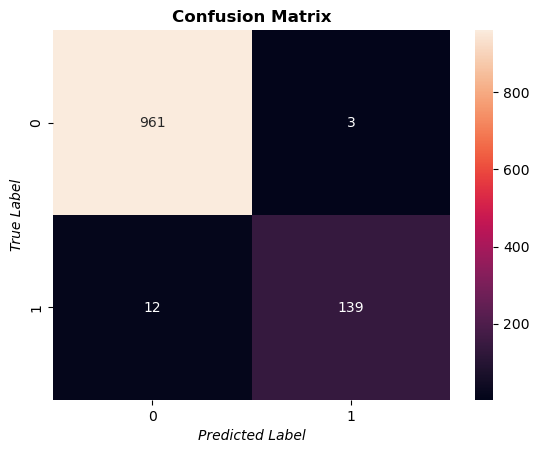

In [5]:
# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.ylabel('True Label', fontstyle='italic')
plt.xlabel('Predicted Label', fontstyle='italic')
plt.title('Confusion Matrix', fontweight='bold')
plt.show()

*Note: This figure shows the confusion matrix for the Naive Bayes classifier applied to the test dataset. The matrix displays the counts of true positives, true negatives, false positives, and false negatives, providing insight into the classifier's performance in terms of both precision and recall.*

**5.2 Classification Report**:
The classification report indicates an overall accuracy of 98.65%, with a precision of 97.89% for the spam class. The model's F1-score of 0.97 for spam suggests that it effectively balances precision and recall.

In [6]:
print(classification_report(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print('Precision:', round(precision_score(y_test, y_pred, pos_label='spam'), 4))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       964
        spam       0.98      0.92      0.95       151

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Accuracy: 0.9865
Precision: 0.9789


<br>

**5.3 ROC Curve**:
The ROC curve demonstrates the model's excellent performance, with an AUC of 0.9783, indicating a high probability that the classifier will correctly distinguish between spam and ham messages.

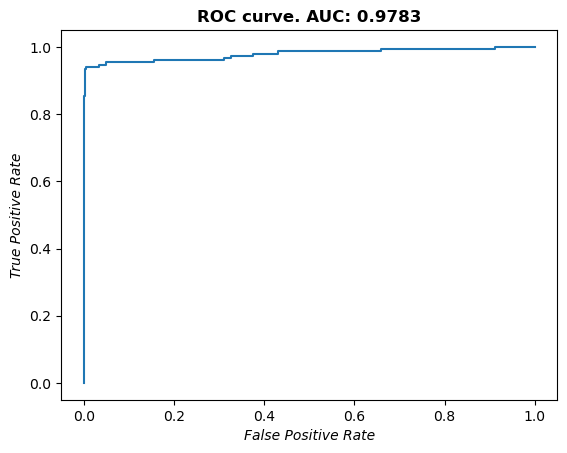

In [8]:
# Show ROC curve
y_pred_prob = classifier.predict_proba(X_test_transformed)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='spam')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', fontstyle='italic')
plt.ylabel('True Positive Rate', fontstyle='italic')
plt.title(f'ROC curve. AUC: {round(auc(fpr, tpr), 4)}', fontweight='bold')
plt.show()

*Note: This figure presents the Receiver Operating Characteristic (ROC) curve for the Naive Bayes classifier. The curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity) across various threshold settings, providing a measure of the model's discriminative ability. The area under the curve (AUC) is a key indicator of the classifier's overall performance.*

<br>

---
<p><h4> <b>6. Discussion</b> </h4></p>

The Naive Bayes classifier demonstrated strong performance in classifying SMS messages as spam or ham. The high accuracy, precision, and AUC values suggest that the model is reliable for practical applications in spam detection. However, the presence of false negatives indicates that some spam messages were incorrectly classified as ham, suggesting potential areas for improvement.

Future enhancements could include tuning hyperparameters, experimenting with different vectorization techniques, or integrating more advanced models like Support Vector Machines or deep learning approaches. Additionally, using more sophisticated preprocessing methods, such as TF-IDF, could further improve the model's ability to detect spam.

<br>

---

<p><h4> <b>7. Conclusion</b> </h4></p>

This study confirms the effectiveness of the Naive Bayes classifier in spam detection tasks. The classifier achieved high accuracy and precision, demonstrating its suitability for filtering unwanted messages in a communication system. Future work could explore the integration of more complex models and preprocessing techniques to further improve classification accuracy and reduce the occurrence of false negatives.

<br>

---

<p><h4> <b>8. References</b> </h4></p>

- Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., ... & Oliphant, T. E. (2020). *Array programming with NumPy*. Nature, 585(7825), 357-362.
- Hunter, J. D. (2007). *Matplotlib: A 2D graphics environment*. Computing in science & engineering, 9(3), 90-95.
- McKinney, W. (2010). *Data structures for statistical computing in Python*. In Proceedings of the 9th Python in Science Conference (Vol. 445, pp. 51-56).
- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). *Scikit-learn: Machine learning in Python*. Journal of machine learning research, 12, 2825-2830.
- Zhang, H. (2004). *The optimality of Naive Bayes*. In Proceedings of the Seventeenth International Florida Artificial Intelligence Research Society Conference (FLAIRS 2004) (pp. 562-567).